In [1]:
import pandas as pd


df = pd.read_csv("Flipkart_Review_After_Analysis.csv")

# Display basic information and first few rows
df

,Rating,Review_Text,Rating_Sentiment,sentiment_score,Predicted_Rating_sentiment,Predicted_Rating
0,1,picture quality amazing not need think twice b...,negative,0.9538,positive,5
1,1,product good but delivery bad worst experience...,negative,-0.8873,negative,1
2,1,review monthsall sudden phone dead taken servi...,negative,-0.6486,negative,1
3,1,camera lens dust particlesit manufacturing def...,negative,0.1149,positive,3
4,1,worst replacement old iphonepickup person vend...,negative,-0.7447,negative,1
...,...,...,...,...,...,...
80876,1,bought day sale delivered flash within one day...,negative,0.8096,positive,5
80877,1,display issue starts blinking,negative,0.0000,average,3
80878,1,phone trash unfixable stuttering issue wheneve...,negative,-0.9516,negative,1
80879,1,instagram screen flickering,negative,0.0000,average,3


In [2]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80881 entries, 0 to 80880
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rating                      80881 non-null  int64  
 1   Review_Text                 80833 non-null  object 
 2   Rating_Sentiment            80881 non-null  object 
 3   sentiment_score             80881 non-null  float64
 4   Predicted_Rating_sentiment  80881 non-null  object 
 5   Predicted_Rating            80881 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.7+ MB


(None,
    Rating                                        Review_Text Rating_Sentiment  \
 0       1  picture quality amazing not need think twice b...         negative   
 1       1  product good but delivery bad worst experience...         negative   
 2       1  review monthsall sudden phone dead taken servi...         negative   
 3       1  camera lens dust particlesit manufacturing def...         negative   
 4       1  worst replacement old iphonepickup person vend...         negative   
 
    sentiment_score Predicted_Rating_sentiment  Predicted_Rating  
 0           0.9538                   positive                 5  
 1          -0.8873                   negative                 1  
 2          -0.6486                   negative                 1  
 3           0.1149                   positive                 3  
 4          -0.7447                   negative                 1  )

In [3]:
import numpy as np

# Drop rows with missing Review_Text
df = df.dropna(subset=['Review_Text'])

# Check for missing values again
df.isnull().sum()


Rating                        0
Review_Text                   0
Rating_Sentiment              0
sentiment_score               0
Predicted_Rating_sentiment    0
Predicted_Rating              0
dtype: int64

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download stopwords if not already available
nltk.download("stopwords")
nltk.download("punkt")

# Initialize tools
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = word_tokenize(text)  # Tokenize text
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and apply stemming
    return " ".join(words)

# Apply preprocessing to Review_Text column
df["Cleaned_Review"] = df["Review_Text"].apply(preprocess_text)

# Display sample processed reviews
df[["Review_Text", "Cleaned_Review"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PYTHON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PYTHON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\3756450329.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cleaned_Review"] = df["Review_Text"].apply(preprocess_text)


,Review_Text,Cleaned_Review
0,picture quality amazing not need think twice b...,pictur qualiti amaz need think twice buy perfo...
1,product good but delivery bad worst experience...,product good deliveri bad worst experi flipkart
2,review monthsall sudden phone dead taken servi...,review monthsal sudden phone dead taken servic...
3,camera lens dust particlesit manufacturing def...,camera len dust particlesit manufactur defect ...
4,worst replacement old iphonepickup person vend...,worst replac old iphonepickup person vender sa...


In [5]:
# Reinitialize the stemmer
stemmer = PorterStemmer()

# Apply preprocessing again
df["Cleaned_Review"] = df["Review_Text"].apply(preprocess_text)

# Show sample processed reviews
df[["Review_Text", "Cleaned_Review"]].head()


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\3522931494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cleaned_Review"] = df["Review_Text"].apply(preprocess_text)


,Review_Text,Cleaned_Review
0,picture quality amazing not need think twice b...,pictur qualiti amaz need think twice buy perfo...
1,product good but delivery bad worst experience...,product good deliveri bad worst experi flipkart
2,review monthsall sudden phone dead taken servi...,review monthsal sudden phone dead taken servic...
3,camera lens dust particlesit manufacturing def...,camera len dust particlesit manufactur defect ...
4,worst replacement old iphonepickup person vend...,worst replac old iphonepickup person vender sa...


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Reinitialize Sentiment Intensity Analyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores["compound"]  # Compound score is a single metric summarizing sentiment

# Apply sentiment analysis
df["Sentiment_Score"] = df["Cleaned_Review"].apply(get_sentiment)

# Categorize sentiment as Positive, Neutral, or Negative
df["Sentiment_Label"] = df["Sentiment_Score"].apply(
    lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral"
)

# Display results
df[["Review_Text", "Cleaned_Review", "Sentiment_Score", "Sentiment_Label"]].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PYTHON\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\2575816053.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_Score"] = df["Cleaned_Review"].apply(get_sentiment)
C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\2575816053.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_Label"] = df["Sentiment_Score"].a

,Review_Text,Cleaned_Review,Sentiment_Score,Sentiment_Label
0,picture quality amazing not need think twice b...,pictur qualiti amaz need think twice buy perfo...,0.9081,Positive
1,product good but delivery bad worst experience...,product good deliveri bad worst experi flipkart,-0.6908,Negative
2,review monthsall sudden phone dead taken servi...,review monthsal sudden phone dead taken servic...,-0.6486,Negative
3,camera lens dust particlesit manufacturing def...,camera len dust particlesit manufactur defect ...,-0.7717,Negative
4,worst replacement old iphonepickup person vend...,worst replac old iphonepickup person vender sa...,-0.5267,Negative


In [7]:
from textblob import TextBlob

# Function to get sentiment scores using TextBlob
def get_sentiment_textblob(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["Sentiment_Score"] = df["Cleaned_Review"].apply(get_sentiment_textblob)

# Categorize sentiment as Positive, Neutral, or Negative
df["Sentiment_Label"] = df["Sentiment_Score"].apply(
    lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral"
)

# Display results
df[["Review_Text", "Cleaned_Review", "Sentiment_Score", "Sentiment_Label"]].head()


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\3321093435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_Score"] = df["Cleaned_Review"].apply(get_sentiment_textblob)
C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\3321093435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_Label"] = df["Sentiment_Score"].apply(


,Review_Text,Cleaned_Review,Sentiment_Score,Sentiment_Label
0,picture quality amazing not need think twice b...,pictur qualiti amaz need think twice buy perfo...,0.311310,Positive
1,product good but delivery bad worst experience...,product good deliveri bad worst experi flipkart,-0.333333,Negative
2,review monthsall sudden phone dead taken servi...,review monthsal sudden phone dead taken servic...,-0.100000,Negative
3,camera lens dust particlesit manufacturing def...,camera len dust particlesit manufactur defect ...,0.000000,Neutral
4,worst replacement old iphonepickup person vend...,worst replac old iphonepickup person vender sa...,-0.266667,Negative


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\1371452267.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])


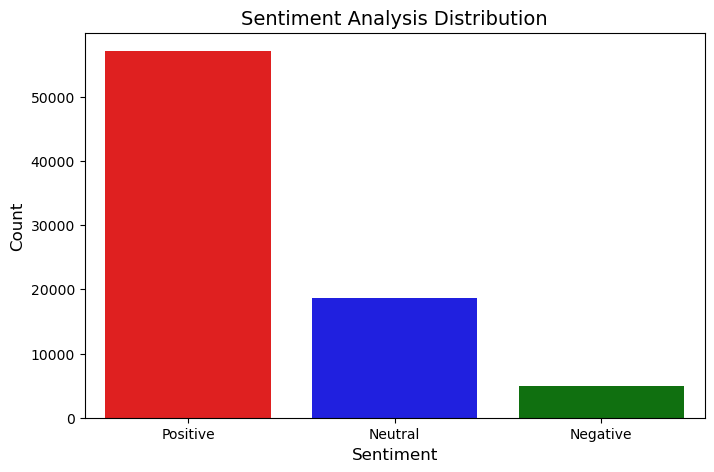

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each sentiment category
sentiment_counts = df["Sentiment_Label"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
plt.title("Sentiment Analysis Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [9]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


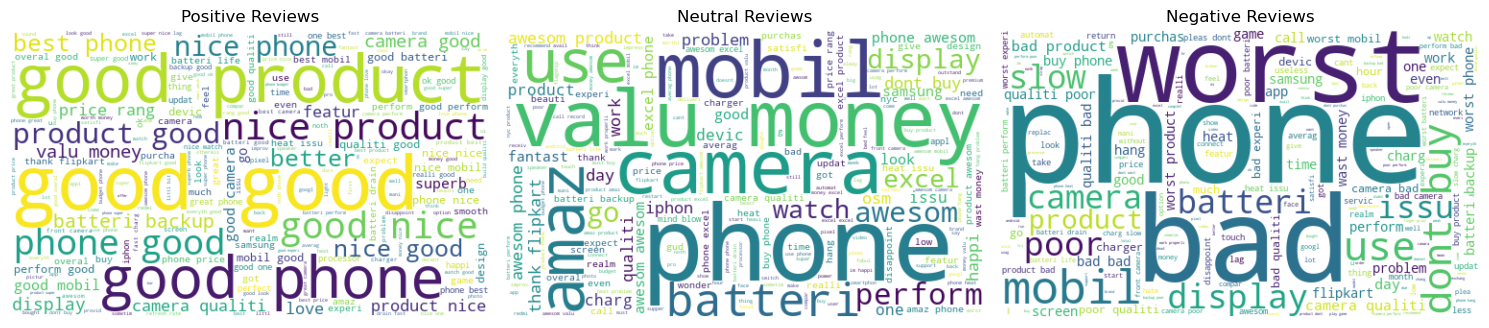

In [10]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(["Positive", "Neutral", "Negative"], 1):
    text = " ".join(df[df["Sentiment_Label"] == sentiment]["Cleaned_Review"])
    wordcloud = WordCloud(width=500, height=300, background_color="white").generate(text)

    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment} Reviews")

plt.tight_layout()
plt.show()


In [13]:
# Sample new reviews for sentiment prediction
new_reviews = [
    "The phone is amazing! Great battery life and smooth performance.",
    "The product is okay, but the delivery was very slow.",
    "Worst experience ever! The phone stopped working within a week.",
    "Camera quality is decent, but the screen brightness is too low.",
    "Absolutely love this watch! The features are fantastic."
]
# Adjusted sentiment classification with refined thresholds
def refine_sentiment_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply refined sentiment classification to the entire dataset
df["Refined_Sentiment"] = df["Sentiment_Score"].apply(refine_sentiment_label)

# Display a few updated results
df[["Review_Text", "Sentiment_Score", "Sentiment_Label", "Refined_Sentiment"]].head()


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_11608\3030846777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Refined_Sentiment"] = df["Sentiment_Score"].apply(refine_sentiment_label)


,Review_Text,Sentiment_Score,Sentiment_Label,Refined_Sentiment
0,picture quality amazing not need think twice b...,0.311310,Positive,Positive
1,product good but delivery bad worst experience...,-0.333333,Negative,Negative
2,review monthsall sudden phone dead taken servi...,-0.100000,Negative,Negative
3,camera lens dust particlesit manufacturing def...,0.000000,Neutral,Neutral
4,worst replacement old iphonepickup person vend...,-0.266667,Negative,Negative


In [17]:
import pandas as pd
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.5:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# User input
user_review = input("Enter your review: ")

# Process and predict sentiment
sentiment_score = get_sentiment(user_review)
sentiment_label = classify_sentiment(sentiment_score)

# # Display result
print(f"\nPredicted Sentiment: {sentiment_label} (Score: {sentiment_score:.2f})")


Enter your review:  not bad



Predicted Sentiment: Positive (Score: 0.35)
